# Project: Investigate a Dataset (No Show Appointments Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.
>
> ‘Neighborhood’ indicates the location of the hospital.
>
> ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

### I'm going to prepare and clean the data then i'm going to figure out which variable affect the probability of showing up. So we can get higher showing up rate.

## Ask
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> Does gender makes difference?
>
> Does naiborhood makes difference?
>
> Does age makes difference?
>
> Does getting sms makes difference?
>
> Does being a handicap makes difference?
>
> Does haveing scholarship makes difference?
>
> Does haveing hipertension makes difference?
>
> Does haveing diabetes makes difference?
>
> Does haveing alcoholism makes difference?
>
> Does having hipertension and diabetes at the same time makes difference?

<a id='wrangling'></a>
## Data Wrangling


### Prepare

In [1]:
### Importing needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the dataframe
df = pd.read_csv('no_show_appointments.csv')

Checking the data for cleanliness

In [3]:
df.shape

(110527, 14)

In [4]:
# checking for duplicates
df.duplicated().any()

False

In [5]:
# checking for null values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [6]:
# checking the data type of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# checking if the patients had more than one appointment
len(df['PatientId'].unique())

62299

In [9]:
# checking if there is any misspellings or typo in some columns
df['Gender'].unique()

array(['F', 'M'], dtype=object)

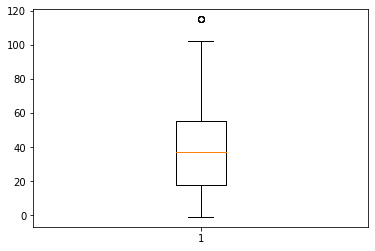

In [11]:
# checking if there is any outliers in age
plt.boxplot(df.Age)
plt.show()

In [12]:
np.sort(df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [13]:
df[df['Age'] == -1]
# looks like there is one row with -1 as age so I'll drop it

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [15]:
df['Hipertension'].unique()

array([1, 0], dtype=int64)

In [16]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [17]:
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [18]:
df['Handcap'].unique()
# (0) means not handicap and the other numbers indcates the development of illness
# according to "https://apps.who.int/iris/bitstream/handle/10665/41003/9241541261_eng.pdf;jsessionid"
# in page 25

array([0, 1, 2, 3, 4], dtype=int64)

In [19]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [20]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

### Process Data from Dirty to Clean

#### The data is almost clean but I need to change some data types and drop the '-1' age row and make a small modification on the columns names

In [21]:
# drop the '-1' age row
df.drop(index=99832, axis=0, inplace=True)

In [22]:
# make sure that the row has been dropped
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [23]:
# change the data type for some coloumns to str because categorical data
cols = ['PatientId','AppointmentID','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
for col in cols:
    df[col] = df[col].astype('str')

In [24]:
# I don't need the dates columns so I'll drop them
df.drop('ScheduledDay',axis=1,inplace=True)
df.drop('AppointmentDay',axis=1,inplace=True)

In [25]:
df.dtypes

PatientId        object
AppointmentID    object
Gender           object
Age               int64
Neighbourhood    object
Scholarship      object
Hipertension     object
Diabetes         object
Alcoholism       object
Handcap          object
SMS_received     object
No-show          object
dtype: object

In [26]:
# change the 'No-show' col to 'No_show'
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [27]:
# make columns names all lowercase to make typing easier
df.columns = df.columns.str.lower()

In [28]:
df.head()

,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



In [29]:
df.head()

,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


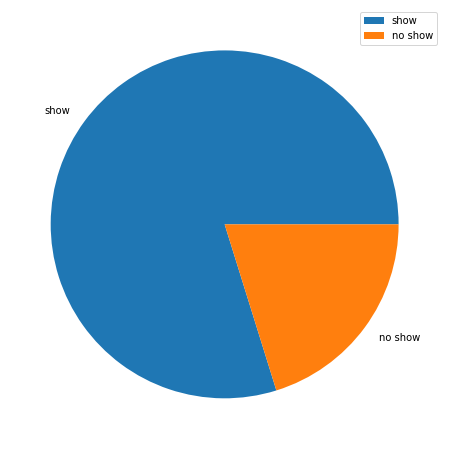

In [30]:
# first showing the diffrence between how many has attended and who didn't
plt.figure(figsize=[16,8])
plt.pie(df.no_show.value_counts(),labels=['show','no show'])
plt.legend()
plt.show()

### Research Question 1 (Does gender makes difference?)

In [31]:
# defining a function that makes a bar plot to show the correlation between one variable and the no_show variable
def vis (x):
    CrosstabResult=pd.crosstab(index=df[x],columns=df['no_show'])
    CrosstabResult.plot.bar(rot=0)
    plt.legend(['Show','No Show'])
    font = {'family':'arial','color':'black','size':20}
    font2 = {'family':'arial','color':'black','size':24}
    plt.xlabel(x,fontdict=font)
    plt.ylabel('count',fontdict=font)
    plt.title(f'{x} vs attendance',fontdict=font2,loc='left')
    plt.show()

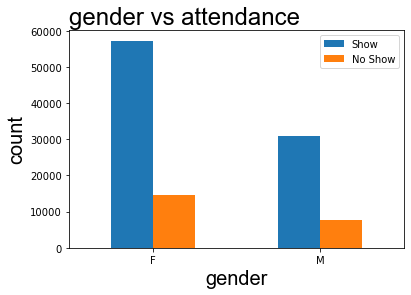

In [32]:
vis('gender')

#### Looks like the no show ratio is almost the same in both genders so I think it doesn't affect  the attendance.

### Research Question 2  (Does naiborhood makes diffrence)

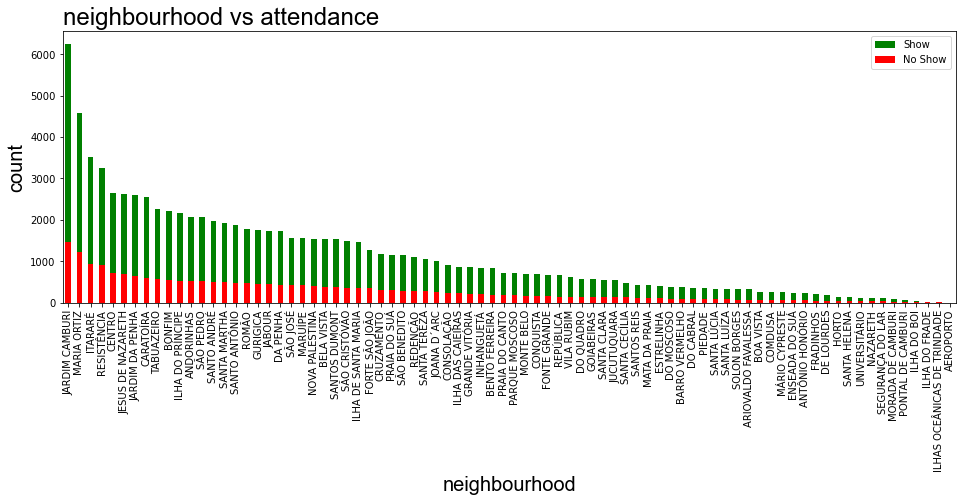

In [33]:
plt.figure(figsize=[16,5])
df.neighbourhood[df.no_show=='No'].value_counts().plot(kind='bar',label = 'show',color='green')
df.neighbourhood[df.no_show=='Yes'].value_counts().plot(kind='bar',label = 'show', color= 'red')
plt.legend(['Show','No Show'])
font = {'family':'arial','color':'black','size':20}
font2 = {'family':'arial','color':'black','size':24}
plt.xlabel('neighbourhood',fontdict=font)
plt.ylabel('count',fontdict=font)
plt.title('neighbourhood vs attendance',fontdict=font2,loc='left')
plt.show()

#### Looks like the no show ratio is almost the same in all neibouthoods so I think it also doesn't affect the attendance.

### Research Question 3 (Does age makes difference?)

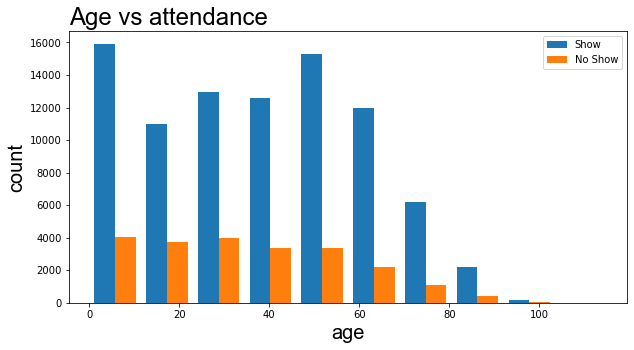

In [34]:
# this histogram shows the ratio between who showed and who didn't
# and because there are a lot of ages I put as a histogram to divide it into categories
plt.figure(figsize=[10,5])
x = df.age[df.no_show=='No']
y = df.age[df.no_show=='Yes']
plt.hist([x,y])
plt.legend(['Show','No Show'])
font = {'family':'arial','color':'black','size':20}
font2 = {'family':'arial','color':'black','size':24}
plt.xlabel('age',fontdict=font)
plt.ylabel('count',fontdict=font)
plt.title('Age vs attendance',fontdict=font2,loc='left')
plt.show()

#### Looks like there is a positive correlation between age and the possibility of not showing up.

### Research Question 4 (Does getting sms makes difference?)

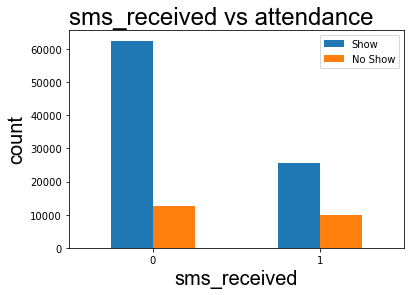

In [35]:
vis('sms_received')

#### That's odd because there is a positive correlation between receiving SMS and the possibility of not showing up.

### Research Question 5 (Does being a handicap make difference?)

In [36]:
CrosstabResult=pd.crosstab(index=df['handcap'],columns=df['no_show'])
CrosstabResult

no_show,No,Yes
handcap,,
0,86373,21912
1,1676,366
2,146,37
3,10,3
4,2,1


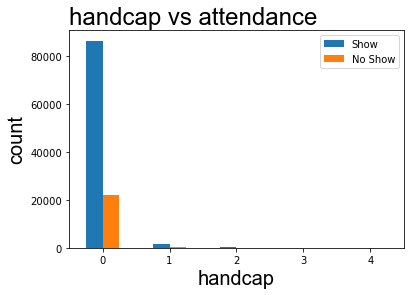

In [37]:
CrosstabResult.plot.bar(rot=0)
plt.legend(['Show','No Show'])
font = {'family':'arial','color':'black','size':20}
font2 = {'family':'arial','color':'black','size':24}
plt.xlabel('handcap',fontdict=font)
plt.ylabel('count',fontdict=font)
plt.title('handcap vs attendance',fontdict=font2,loc='left')
plt.show()

In [38]:
# removing not handicap persons to see the other segments 
CrosstabResult = CrosstabResult.iloc[1:,:]

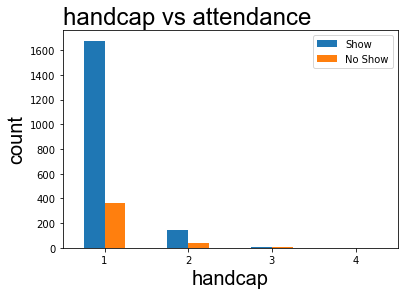

In [39]:
CrosstabResult.plot.bar(rot=0)
plt.legend(['Show','No Show'])
font = {'family':'arial','color':'black','size':20}
font2 = {'family':'arial','color':'black','size':24}
plt.xlabel('handcap',fontdict=font)
plt.ylabel('count',fontdict=font)
plt.title('handcap vs attendance',fontdict=font2,loc='left')
plt.show()

#### looks like there is no correlation between being a handicap of any level or not and attendance.

### Research Question 6 (Does having scholarship makes difference?)

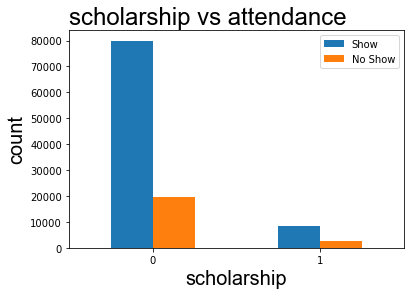

In [40]:
vis('scholarship')

#### The ratio between who have a scholarship and who doesn't is almost the same so having scholarship doesn't make difference.

### Research Question 7 (Does having hipertension makes difference?)

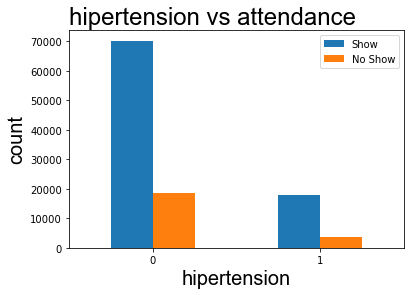

In [41]:
vis('hipertension')

#### Looks like hipertension doesn't have an effect on attendance.

### Research Question 8 (Does having  diabetes makes difference?)

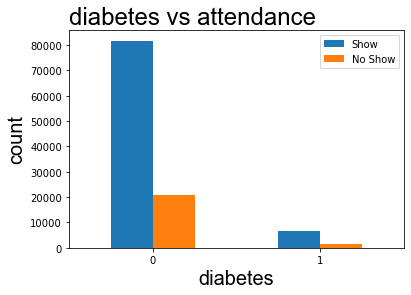

In [42]:
vis('diabetes')

#### Like hipertension diabetes doesn't have and effect on attendance.

### Research Question 9 (Does being alcoholic makes difference?)

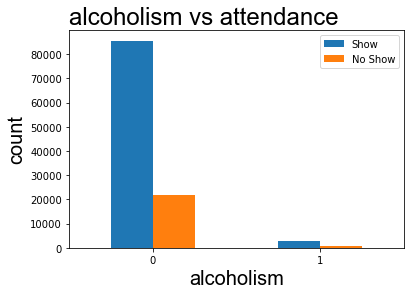

In [43]:
vis('alcoholism')

#### The alcoholic percentage of the sample is very small so we can't determine whether it has an effect or not.

### Research Question 10 (Does having hipertension and diabetes at the same time makes difference?)

#### a lot of people have hypertension diabetes at the same time so i want to know if having both diseases have any effect on attendance

In [44]:
CrosstabResult=pd.crosstab(index=[df['hipertension'],df['diabetes']],columns=df['no_show'])

In [45]:
CrosstabResult

no_show                   No    Yes
hipertension diabetes              
0            0         69010  18258
             1          1168    289
1            0         12684   2631
             1          5345   1141

In [46]:
CrosstabResult['total'] = CrosstabResult.No + CrosstabResult.Yes
CrosstabResult['no_percent'] = CrosstabResult.No / CrosstabResult.total*100
CrosstabResult['yes_percent'] = CrosstabResult.Yes / CrosstabResult.total*100
CrosstabResult

no_show                   No    Yes  total  no_percent  yes_percent
hipertension diabetes                                              
0            0         69010  18258  87268   79.078242    20.921758
             1          1168    289   1457   80.164722    19.835278
1            0         12684   2631  15315   82.820764    17.179236
             1          5345   1141   6486   82.408264    17.591736

In [47]:
CrosstabResult = CrosstabResult.iloc[[0,-1]]

In [48]:
CrosstabResult

,no_show,No,Yes,total,no_percent,yes_percent
hipertension,diabetes,,,,,
0,0,69010,18258,87268,79.078242,20.921758
1,1,5345,1141,6486,82.408264,17.591736


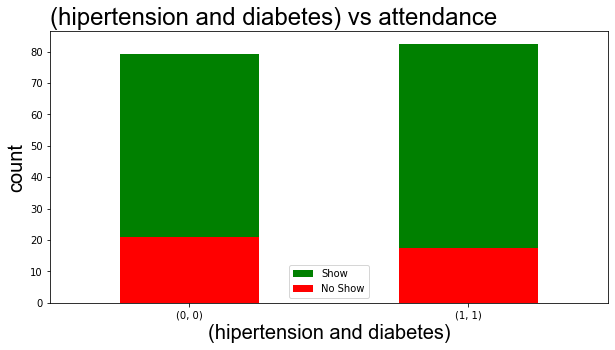

In [49]:
plt.figure(figsize=[10,5])
CrosstabResult['no_percent'].plot.bar(rot=0, color='green')
CrosstabResult['yes_percent'].plot.bar(rot=0, color= 'red')
plt.legend(['Show','No Show'])
font = {'family':'arial','color':'black','size':20}
font2 = {'family':'arial','color':'black','size':24}
plt.xlabel('(hipertension and diabetes)',fontdict=font)
plt.ylabel('count',fontdict=font)
plt.title('(hipertension and diabetes) vs attendance',fontdict=font2,loc='left')
plt.show()

#### Looks like there is no effect on attendance

<a id='conclusions'></a>
## Conclusions

### Findings

> 1- Age has an effect on showing up.
> people from 0 to 10 years have the most attending rate and it goes down till the 50s then we see that the people in the 50s tend to not miss their appointment and it goes down again after that
>
> 2- There is a negative correlation between receiving an SMS and showing up. looks like the people who got an SMS tend to not show up
>
> 3- The number of people who have insurance is much smaller than the people who doesn't have it but it doesn't affect the probability of showing up.

### Tips
> 1- we should make a campaign that targets the people who are between 20 years old and 50 years old and who are older than 60 as it should know the reason behind this significant decrease and fix it.
>
> 2- We should check the messaging campaign and figure out why it has a negative effect so we can improve it. maybe it's the timing or the SMS is not that clear to the patients

### Limitations

> [Gender, Neighbourhood, Hipertension, Diabetes, Handicap]
>
> All these variables has no effect on the probability of showing up as it's almost the same percentage in both groups.